In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import gaussian_kde

# Question 1

In [3]:
p3_data = np.genfromtxt('problem_3_data.csv', delimiter=',')
p3_data.shape

(1000,)

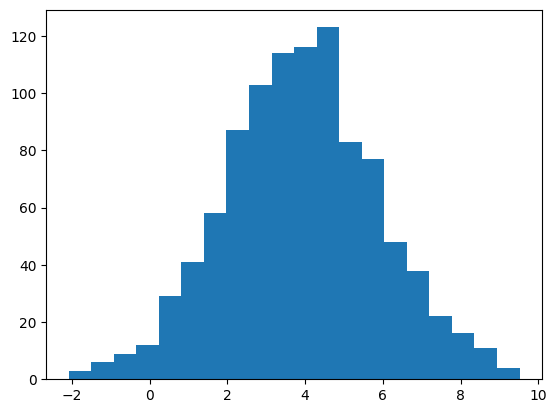

In [4]:
plt.hist(p3_data, bins=20)
plt.show()

The distribution above looks like a normal distribution

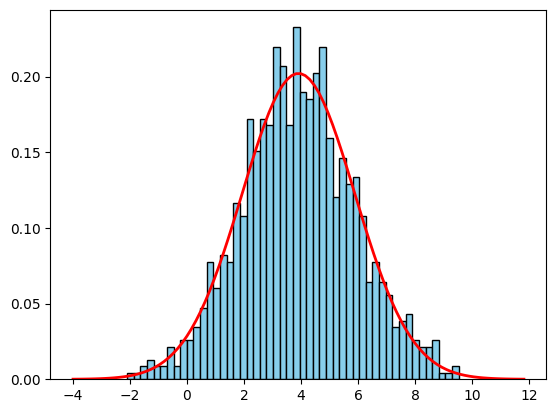

In [5]:
plt.hist(p3_data, bins=50, density=True, color='skyblue', edgecolor='black')
mean = np.mean(p3_data)
std = np.std(p3_data)
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))
plt.plot(x, y, color='red', linewidth=2)
plt.show()

# Question 2

In [6]:
p4_data = np.genfromtxt('problem_4_data.csv', delimiter=',')
p4_data.shape

(1000,)

In [7]:
pdf = 0
σ = 0.4
n = len(p4_data)
x = np.linspace(np.min(p4_data),np.max(p4_data),100)

def gaussian(μ,σ,x):
	return (np.exp(-(x-μ)**2/(2*σ**2))/(np.sqrt(2*np.pi)*σ))

for i in range(n):
	pdf += gaussian(p4_data[i],σ,x)
pdf = pdf/n

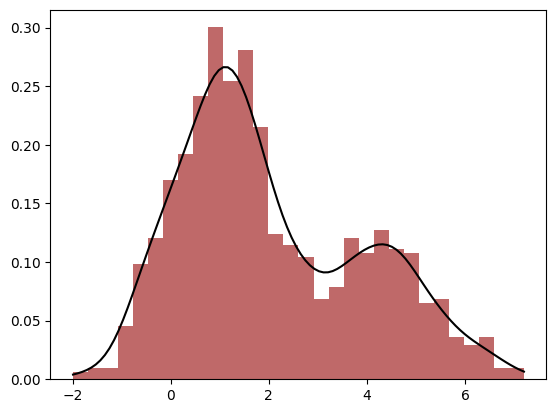

In [8]:
plt.hist(p4_data,bins=30, alpha=0.7,color='brown',density=True)
plt.plot(x,pdf,color='black')

# Question 3

In [9]:
def f(x):
    return x**2 - 3*x + 4

ans, error = quad(f, 0, 2)
print(ans)
print(14/3)

4.666666666666666
4.666666666666667


In [11]:
samples = np.random.uniform(0, 2, 10000)
ans = (2-0) * (np.sum(f(samples)) / 10000)
ans

4.675672789592427

In [37]:
accepted = []
for i in range(500000):
    x = np.random.uniform(0, 2)
    q = np.random.uniform(0, 1)

    if q < f(x) / 4:
        accepted.append(x)

accepted = np.array(accepted)
ans = (2-0) * 4 * (len(accepted) / 500000)
ans

4.67608

In [41]:
def q(x):
    return 1 / 2

samples = np.random.uniform(0, 2, 10000)
integral_estimate = np.mean(f(samples) / q(samples))
integral_estimate

4.674404387529568

# Question 4

In [49]:
X = np.genfromtxt('complex_distribution.csv', delimiter=',')
X.shape

(10001,)

In [70]:
kde = gaussian_kde(X)

# Evaluate KDE on a grid
x_grid = np.linspace(X.min(), X.max(), 10000)
p_x = kde(x_grid)
p_x

array([3.93421804e-03, 3.95696889e-03, 3.97983082e-03, ...,
       7.78132417e-05, 7.77575394e-05, 7.77015261e-05])

In [53]:
def rejection_sampling(kde, n_samples, x_min, x_max):
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(x_min, x_max)
        u = np.random.uniform(0, 1)
        if u < kde(x):
            samples.append(x)
    return np.array(samples)

X_hat = rejection_sampling(kde, 10000, X.min(), X.max())

In [54]:
X_bar = kde.resample(10000).flatten()

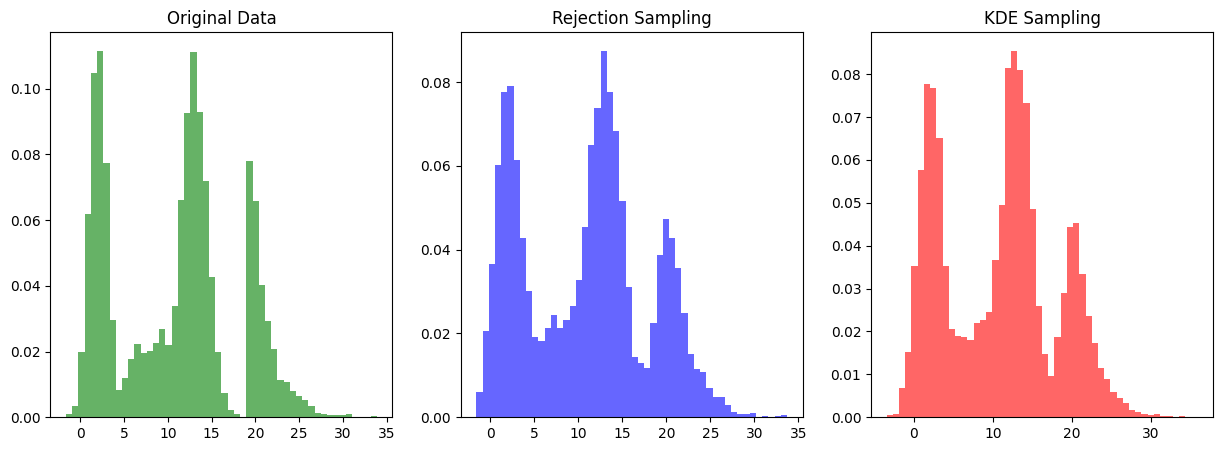

In [76]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(X, bins=50, density=True, alpha=0.6, color='g')
plt.title('Original Data')

plt.subplot(1, 3, 2)
plt.hist(X_hat, bins=50, density=True, alpha=0.6, color='b')
plt.title('Rejection Sampling')

plt.subplot(1, 3, 3)
plt.hist(X_bar, bins=50, density=True, alpha=0.6, color='r')
plt.title('KDE Sampling')

plt.show()

In [72]:
print("Exptected value:", np.mean(X))
print("Variance:", np.mean((X-np.mean(X))**2))
print("Exptected value of 3x+2:", np.mean(3*X + 2))
print("Exptected value of x^2 - 5x:", np.mean(X**2 - 5*X))
print("Exptected value of 2e^x + 1:", np.mean(2*np.exp(X) + 1))

Exptected value: 10.814000119911924
Variance: 49.40961360042826
Exptected value of 3x+2: 34.44200035973577
Exptected value of x^2 - 5x: 112.28221159432371
Exptected value of 2e^x + 1: 258969297984.54385


In [73]:
print("Exptected value:", np.mean(X_hat))
print("Variance:", np.mean((X_hat-np.mean(X_hat))**2))
print("Exptected value of 3x+2:", np.mean(3*X_hat + 2))
print("Exptected value of x^2 - 5x:", np.mean(X_hat**2 - 5*X_hat))
print("Exptected value of 2e^x + 1:", np.mean(2*np.exp(X_hat) + 1))

Exptected value: 10.848280515334212
Variance: 50.812236910485616
Exptected value of 3x+2: 34.544841546002644
Exptected value of x^2 - 5x: 114.25602447319447
Exptected value of 2e^x + 1: 337339508017.6258


In [74]:
print("Exptected value:", np.mean(X_bar))
print("Variance:", np.mean((X_bar-np.mean(X_bar))**2))
print("Exptected value of 3x+2:", np.mean(3*X_bar + 2))
print("Exptected value of x^2 - 5x:", np.mean(X_bar**2 - 5*X_bar))
print("Exptected value of 2e^x + 1:", np.mean(2*np.exp(X_bar) + 1))

Exptected value: 10.828002164868199
Variance: 51.17501135346884
Exptected value of 3x+2: 34.48400649460459
Exptected value of x^2 - 5x: 114.28063141151824
Exptected value of 2e^x + 1: 1083282005819.0225


# Question 5

In [81]:
samples = np.random.uniform(0, 2, 10000)
f  = np.log(samples + 1)
ans = 2 * np.mean(f)
ans

1.2917085371303274

# Question 6

In [83]:
samples = np.random.uniform(0, 1, 10000)
f  =  samples**2 - samples + 1
ans = 1 * np.mean(f)
ans

0.8341822107464748